Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df_test=pd.read_csv(r"C:\Users\alb\Desktop\proyectos kaggle\casas\test.csv")
df_train=pd.read_csv(r"C:\Users\alb\Desktop\proyectos kaggle\casas\train.csv")

df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Checking nans in both: Train and Test variables

In [3]:
df_train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [4]:
df_test.isnull().any()

Id               False
MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
                 ...  
MiscVal          False
MoSold           False
YrSold           False
SaleType          True
SaleCondition    False
Length: 80, dtype: bool

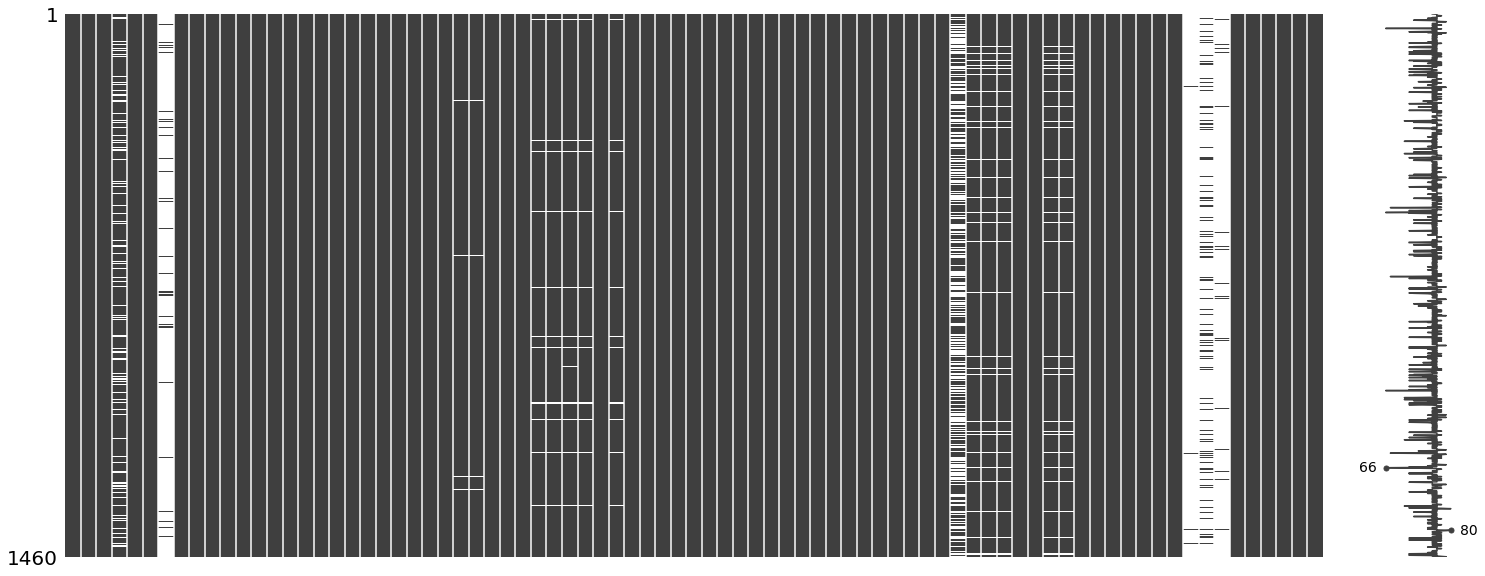

In [5]:
msno.matrix(df_train)

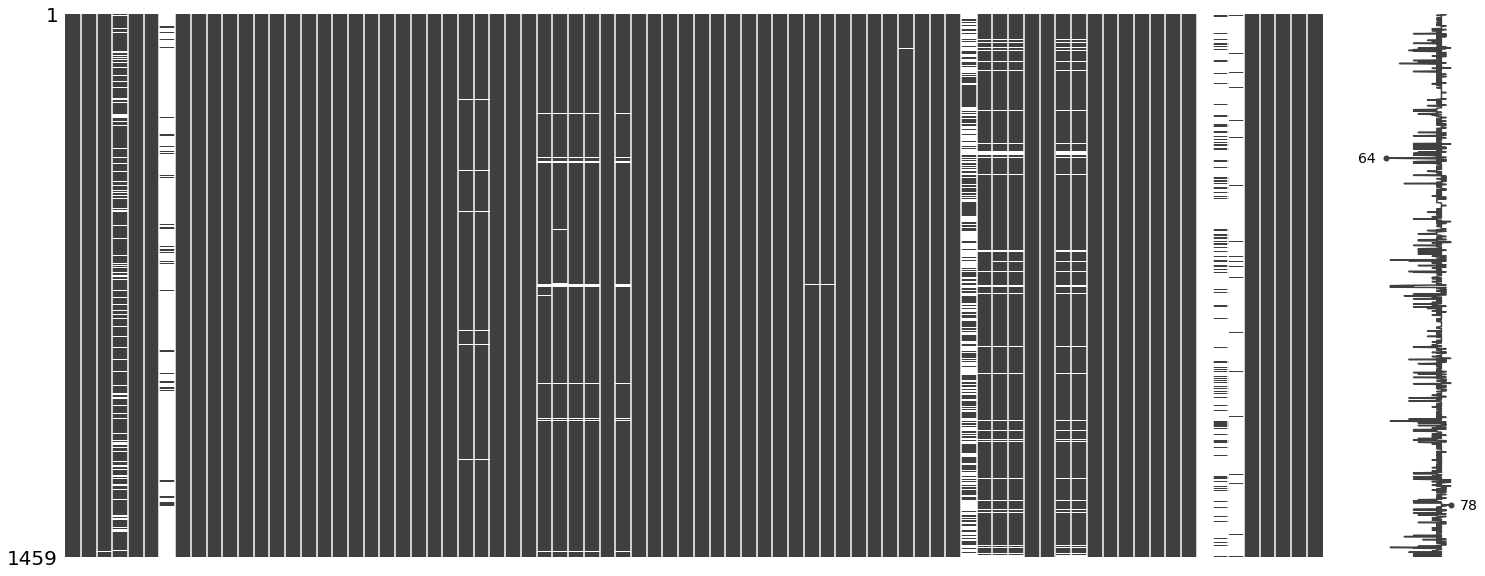

In [6]:
msno.matrix(df_test)

In [7]:
for col in df_train.columns:
    print(col,"=",pd.isnull(df_train[col]).values.ravel().sum()),"Nans"

Id = 0
MSSubClass = 0
MSZoning = 0
LotFrontage = 259
LotArea = 0
Street = 0
Alley = 1369
LotShape = 0
LandContour = 0
Utilities = 0
LotConfig = 0
LandSlope = 0
Neighborhood = 0
Condition1 = 0
Condition2 = 0
BldgType = 0
HouseStyle = 0
OverallQual = 0
OverallCond = 0
YearBuilt = 0
YearRemodAdd = 0
RoofStyle = 0
RoofMatl = 0
Exterior1st = 0
Exterior2nd = 0
MasVnrType = 8
MasVnrArea = 8
ExterQual = 0
ExterCond = 0
Foundation = 0
BsmtQual = 37
BsmtCond = 37
BsmtExposure = 38
BsmtFinType1 = 37
BsmtFinSF1 = 0
BsmtFinType2 = 38
BsmtFinSF2 = 0
BsmtUnfSF = 0
TotalBsmtSF = 0
Heating = 0
HeatingQC = 0
CentralAir = 0
Electrical = 1
1stFlrSF = 0
2ndFlrSF = 0
LowQualFinSF = 0
GrLivArea = 0
BsmtFullBath = 0
BsmtHalfBath = 0
FullBath = 0
HalfBath = 0
BedroomAbvGr = 0
KitchenAbvGr = 0
KitchenQual = 0
TotRmsAbvGrd = 0
Functional = 0
Fireplaces = 0
FireplaceQu = 690
GarageType = 81
GarageYrBlt = 81
GarageFinish = 81
GarageCars = 0
GarageArea = 0
GarageQual = 81
GarageCond = 81
PavedDrive = 0
WoodDeckSF =

In [8]:
for col in df_test.columns:
    print(col,"=",pd.isnull(df_test[col]).values.ravel().sum()),"Nans"

Id = 0
MSSubClass = 0
MSZoning = 4
LotFrontage = 227
LotArea = 0
Street = 0
Alley = 1352
LotShape = 0
LandContour = 0
Utilities = 2
LotConfig = 0
LandSlope = 0
Neighborhood = 0
Condition1 = 0
Condition2 = 0
BldgType = 0
HouseStyle = 0
OverallQual = 0
OverallCond = 0
YearBuilt = 0
YearRemodAdd = 0
RoofStyle = 0
RoofMatl = 0
Exterior1st = 1
Exterior2nd = 1
MasVnrType = 16
MasVnrArea = 15
ExterQual = 0
ExterCond = 0
Foundation = 0
BsmtQual = 44
BsmtCond = 45
BsmtExposure = 44
BsmtFinType1 = 42
BsmtFinSF1 = 1
BsmtFinType2 = 42
BsmtFinSF2 = 1
BsmtUnfSF = 1
TotalBsmtSF = 1
Heating = 0
HeatingQC = 0
CentralAir = 0
Electrical = 0
1stFlrSF = 0
2ndFlrSF = 0
LowQualFinSF = 0
GrLivArea = 0
BsmtFullBath = 2
BsmtHalfBath = 2
FullBath = 0
HalfBath = 0
BedroomAbvGr = 0
KitchenAbvGr = 0
KitchenQual = 1
TotRmsAbvGrd = 0
Functional = 2
Fireplaces = 0
FireplaceQu = 730
GarageType = 76
GarageYrBlt = 78
GarageFinish = 78
GarageCars = 1
GarageArea = 1
GarageQual = 78
GarageCond = 78
PavedDrive = 0
WoodDeckSF

In [9]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

df_test.columns

Remove the columns with more nans in both

In [11]:
df_train.drop(["Alley","PoolQC","Fence","MiscFeature","FireplaceQu"], axis = 'columns', inplace=True)

In [12]:
df_test.drop(["Alley","PoolQC","Fence","MiscFeature","FireplaceQu"], axis = 'columns', inplace=True)

Create numeric list of both

In [13]:
lista_numericas = df_train._get_numeric_data().columns #utiliza dtype para identificar columnas númericas
len(lista_numericas)

38

In [14]:
lista_numericas_00= df_test._get_numeric_data().columns #utiliza dtype para identificar columnas númericas
len(lista_numericas_00)

37

In [15]:
#División entre variables numéricas y categóricas
lista_numericas = df_train._get_numeric_data().columns #utiliza dtype para identificar columnas númericas
lista_numericas

df_num = df_train[lista_numericas]
df_num.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [16]:
#División entre variables numéricas y categóricas
lista_numericas_00 = df_test._get_numeric_data().columns #utiliza dtype para identificar columnas númericas
lista_numericas_00
df_num_test = df_test[lista_numericas_00]
df_num_test.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


Create cat list of both

In [17]:
df_cat = df_train.drop(lista_numericas, axis=1)
df_cat.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [18]:
df_cat_test = df_test.drop(lista_numericas_00, axis=1)
df_cat_test.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [19]:
for column in df_num:
    print(column)
    print (df_num[column].isnull().sum()/len(df_num[column])*100)
    print("")  

Id
0.0

MSSubClass
0.0

LotFrontage
17.73972602739726

LotArea
0.0

OverallQual
0.0

OverallCond
0.0

YearBuilt
0.0

YearRemodAdd
0.0

MasVnrArea
0.547945205479452

BsmtFinSF1
0.0

BsmtFinSF2
0.0

BsmtUnfSF
0.0

TotalBsmtSF
0.0

1stFlrSF
0.0

2ndFlrSF
0.0

LowQualFinSF
0.0

GrLivArea
0.0

BsmtFullBath
0.0

BsmtHalfBath
0.0

FullBath
0.0

HalfBath
0.0

BedroomAbvGr
0.0

KitchenAbvGr
0.0

TotRmsAbvGrd
0.0

Fireplaces
0.0

GarageYrBlt
5.5479452054794525

GarageCars
0.0

GarageArea
0.0

WoodDeckSF
0.0

OpenPorchSF
0.0

EnclosedPorch
0.0

3SsnPorch
0.0

ScreenPorch
0.0

PoolArea
0.0

MiscVal
0.0

MoSold
0.0

YrSold
0.0

SalePrice
0.0



In [20]:
for column in df_num_test:
    print(column)
    print (df_num_test[column].isnull().sum()/len(df_num_test[column])*100)
    print("") 

Id
0.0

MSSubClass
0.0

LotFrontage
15.558601782042494

LotArea
0.0

OverallQual
0.0

OverallCond
0.0

YearBuilt
0.0

YearRemodAdd
0.0

MasVnrArea
1.0281014393420151

BsmtFinSF1
0.06854009595613435

BsmtFinSF2
0.06854009595613435

BsmtUnfSF
0.06854009595613435

TotalBsmtSF
0.06854009595613435

1stFlrSF
0.0

2ndFlrSF
0.0

LowQualFinSF
0.0

GrLivArea
0.0

BsmtFullBath
0.1370801919122687

BsmtHalfBath
0.1370801919122687

FullBath
0.0

HalfBath
0.0

BedroomAbvGr
0.0

KitchenAbvGr
0.0

TotRmsAbvGrd
0.0

Fireplaces
0.0

GarageYrBlt
5.346127484578479

GarageCars
0.06854009595613435

GarageArea
0.06854009595613435

WoodDeckSF
0.0

OpenPorchSF
0.0

EnclosedPorch
0.0

3SsnPorch
0.0

ScreenPorch
0.0

PoolArea
0.0

MiscVal
0.0

MoSold
0.0

YrSold
0.0



Use the simpleimputer to replace the nans with the mean

In [21]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_num_imp = imputer.fit_transform(df_num)
df_num_imp

array([[1.00000e+00, 6.00000e+01, 6.50000e+01, ..., 2.00000e+00,
        2.00800e+03, 2.08500e+05],
       [2.00000e+00, 2.00000e+01, 8.00000e+01, ..., 5.00000e+00,
        2.00700e+03, 1.81500e+05],
       [3.00000e+00, 6.00000e+01, 6.80000e+01, ..., 9.00000e+00,
        2.00800e+03, 2.23500e+05],
       ...,
       [1.45800e+03, 7.00000e+01, 6.60000e+01, ..., 5.00000e+00,
        2.01000e+03, 2.66500e+05],
       [1.45900e+03, 2.00000e+01, 6.80000e+01, ..., 4.00000e+00,
        2.01000e+03, 1.42125e+05],
       [1.46000e+03, 2.00000e+01, 7.50000e+01, ..., 6.00000e+00,
        2.00800e+03, 1.47500e+05]])

Scaling the values using MinMaxScaler for better procesding

In [22]:
from sklearn.preprocessing import MinMaxScaler
df_num_imp5 = MinMaxScaler().fit_transform(df_num_imp)
df_num_imp6 = pd.DataFrame(df_num_imp5, columns = df_num.columns)
df_num_imp6.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,...,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.241078
1,0.000685,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,...,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.203583
2,0.001371,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,...,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.261908
3,0.002056,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,...,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.145952
4,0.002742,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,...,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.298709


In [23]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_num_imp_test = imputer.fit_transform(df_num_test)
df_num_imp_test

array([[1.461e+03, 2.000e+01, 8.000e+01, ..., 0.000e+00, 6.000e+00,
        2.010e+03],
       [1.462e+03, 2.000e+01, 8.100e+01, ..., 1.250e+04, 6.000e+00,
        2.010e+03],
       [1.463e+03, 6.000e+01, 7.400e+01, ..., 0.000e+00, 3.000e+00,
        2.010e+03],
       ...,
       [2.917e+03, 2.000e+01, 1.600e+02, ..., 0.000e+00, 9.000e+00,
        2.006e+03],
       [2.918e+03, 8.500e+01, 6.200e+01, ..., 7.000e+02, 7.000e+00,
        2.006e+03],
       [2.919e+03, 6.000e+01, 7.400e+01, ..., 0.000e+00, 1.100e+01,
        2.006e+03]])

In [24]:
from sklearn.preprocessing import MinMaxScaler
df_num_test5 = MinMaxScaler().fit_transform(df_num_imp_test)
df_num_test6 = pd.DataFrame(df_num_test5, columns = df_num_test.columns)
df_num_test6.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.000000,0.000000,0.329609,0.184147,0.444444,0.625,0.625954,0.183333,0.000000,0.116708,...,0.490591,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0
1,0.000686,0.000000,0.335196,0.232124,0.555556,0.625,0.603053,0.133333,0.083721,0.230175,...,0.209677,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0
2,0.001372,0.235294,0.296089,0.224197,0.444444,0.500,0.900763,0.800000,0.000000,0.197257,...,0.323925,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0
3,0.002058,0.235294,0.318436,0.154326,0.555556,0.625,0.908397,0.800000,0.015504,0.150125,...,0.315860,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0
4,0.002743,0.588235,0.122905,0.064121,0.777778,0.500,0.862595,0.700000,0.000000,0.065586,...,0.340054,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0


In [25]:
df_num = pd.DataFrame(df_num_imp6, columns = df_num.columns)
df_num.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,...,0.000000,0.111517,0.000000,0.000000,0.0,0.0,0.000000,0.090909,0.50,0.241078
1,0.000685,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,...,0.347725,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.363636,0.25,0.203583
2,0.001371,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,...,0.000000,0.076782,0.000000,0.000000,0.0,0.0,0.000000,0.727273,0.50,0.261908
3,0.002056,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,...,0.000000,0.063985,0.492754,0.000000,0.0,0.0,0.000000,0.090909,0.00,0.145952
4,0.002742,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,...,0.224037,0.153565,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.50,0.298709
5,0.003427,0.176471,0.219178,0.059899,0.444444,0.500,0.876812,0.750000,0.00000,0.129695,...,0.046674,0.054845,0.000000,0.629921,0.0,0.0,0.045161,0.818182,0.75,0.150118
6,0.004112,0.000000,0.184932,0.041057,0.777778,0.500,0.956522,0.916667,0.11625,0.242558,...,0.297550,0.104205,0.000000,0.000000,0.0,0.0,0.000000,0.636364,0.25,0.377864
7,0.004798,0.235294,0.167979,0.042450,0.666667,0.625,0.731884,0.383333,0.15000,0.152197,...,0.274212,0.372943,0.413043,0.000000,0.0,0.0,0.022581,0.909091,0.75,0.229274
8,0.005483,0.176471,0.102740,0.022529,0.666667,0.500,0.427536,0.000000,0.00000,0.000000,...,0.105018,0.000000,0.371377,0.000000,0.0,0.0,0.000000,0.272727,0.50,0.131926
9,0.006169,1.000000,0.099315,0.028605,0.444444,0.625,0.485507,0.000000,0.00000,0.150780,...,0.000000,0.007313,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.50,0.115401


In [26]:
df_num_test = pd.DataFrame(df_num_test6, columns = df_num_test.columns)
df_num_test.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.000000,0.000000,0.329609,0.184147,0.444444,0.625,0.625954,0.183333,0.000000,0.116708,...,0.490591,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0
1,0.000686,0.000000,0.335196,0.232124,0.555556,0.625,0.603053,0.133333,0.083721,0.230175,...,0.209677,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0
2,0.001372,0.235294,0.296089,0.224197,0.444444,0.500,0.900763,0.800000,0.000000,0.197257,...,0.323925,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0
3,0.002058,0.235294,0.318436,0.154326,0.555556,0.625,0.908397,0.800000,0.015504,0.150125,...,0.315860,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0
4,0.002743,0.588235,0.122905,0.064121,0.777778,0.500,0.862595,0.700000,0.000000,0.065586,...,0.340054,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0
5,0.003429,0.235294,0.301676,0.154725,0.555556,0.500,0.870229,0.733333,0.000000,0.000000,...,0.295699,0.110253,0.113208,0.0,0.0,0.000000,0.0,0.000000,0.272727,1.0
6,0.004115,0.000000,0.265812,0.118085,0.555556,0.750,0.862595,0.950000,0.000000,0.233167,...,0.282258,0.339185,0.028302,0.0,0.0,0.000000,0.0,0.029412,0.181818,1.0
7,0.004801,0.235294,0.234637,0.125739,0.555556,0.500,0.908397,0.800000,0.000000,0.000000,...,0.264113,0.000000,0.101078,0.0,0.0,0.000000,0.0,0.000000,0.363636,1.0
8,0.005487,0.000000,0.357542,0.157918,0.666667,0.500,0.847328,0.666667,0.000000,0.158853,...,0.340054,0.134831,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.090909,1.0
9,0.006173,0.000000,0.273743,0.125703,0.333333,0.500,0.694656,0.333333,0.000000,0.200499,...,0.352823,0.168539,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.272727,1.0


In [27]:
for column in df_num:
    print(column)
    print (df_num[column].isnull().sum()/len(df_num[column])*100)
    print("") 

Id
0.0

MSSubClass
0.0

LotFrontage
0.0

LotArea
0.0

OverallQual
0.0

OverallCond
0.0

YearBuilt
0.0

YearRemodAdd
0.0

MasVnrArea
0.0

BsmtFinSF1
0.0

BsmtFinSF2
0.0

BsmtUnfSF
0.0

TotalBsmtSF
0.0

1stFlrSF
0.0

2ndFlrSF
0.0

LowQualFinSF
0.0

GrLivArea
0.0

BsmtFullBath
0.0

BsmtHalfBath
0.0

FullBath
0.0

HalfBath
0.0

BedroomAbvGr
0.0

KitchenAbvGr
0.0

TotRmsAbvGrd
0.0

Fireplaces
0.0

GarageYrBlt
0.0

GarageCars
0.0

GarageArea
0.0

WoodDeckSF
0.0

OpenPorchSF
0.0

EnclosedPorch
0.0

3SsnPorch
0.0

ScreenPorch
0.0

PoolArea
0.0

MiscVal
0.0

MoSold
0.0

YrSold
0.0

SalePrice
0.0



In [28]:
for column in df_num_test:
    print(column)
    print (df_num_test[column].isnull().sum()/len(df_num_test[column])*100)
    print("") 

Id
0.0

MSSubClass
0.0

LotFrontage
0.0

LotArea
0.0

OverallQual
0.0

OverallCond
0.0

YearBuilt
0.0

YearRemodAdd
0.0

MasVnrArea
0.0

BsmtFinSF1
0.0

BsmtFinSF2
0.0

BsmtUnfSF
0.0

TotalBsmtSF
0.0

1stFlrSF
0.0

2ndFlrSF
0.0

LowQualFinSF
0.0

GrLivArea
0.0

BsmtFullBath
0.0

BsmtHalfBath
0.0

FullBath
0.0

HalfBath
0.0

BedroomAbvGr
0.0

KitchenAbvGr
0.0

TotRmsAbvGrd
0.0

Fireplaces
0.0

GarageYrBlt
0.0

GarageCars
0.0

GarageArea
0.0

WoodDeckSF
0.0

OpenPorchSF
0.0

EnclosedPorch
0.0

3SsnPorch
0.0

ScreenPorch
0.0

PoolArea
0.0

MiscVal
0.0

MoSold
0.0

YrSold
0.0



In [29]:
#Eliminamos los NaN del dataframe, convirtiéndolo en una matriz
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_cat_imp = imputer.fit_transform(df_cat)
df_cat_imp

array([['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'IR1', ..., 'Y', 'WD', 'Normal'],
       ...,
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal']], dtype=object)

In [30]:
#Eliminamos los NaN del dataframe, convirtiéndolo en una matriz
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_cat_imp_test = imputer.fit_transform(df_cat_test)
df_cat_imp_test

array([['RH', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'IR1', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'IR1', ..., 'Y', 'WD', 'Normal'],
       ...,
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Abnorml'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal']], dtype=object)

In [31]:
#Convertimos la matriz a DataFrame de nuevo
df_cat = pd.DataFrame(df_cat_imp, columns = df_cat.columns)
df_cat.head(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,FuseF,TA,Min1,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,SBrkr,TA,Typ,Attchd,RFn,Gd,TA,Y,WD,Normal


In [32]:
#Convert the matrix to a new df
df_cat_test = pd.DataFrame(df_cat_imp_test, columns = df_cat.columns)
df_cat_test.head(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
6,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
8,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


In [33]:
# this loop for is created to pass the dummies to the numeric df(df_num)train
for i in df_cat.columns:
    dummy_ = pd.get_dummies(df_cat[i], prefix = i)
    df_final_train = pd.concat([df_num, dummy_], axis = 1)

In [34]:
# this loop for is created to pass the dummies to the numeric df(df_num)test
for i in df_cat_test.columns:
    dummy_ = pd.get_dummies(df_cat_test[i], prefix = i)
    df_final_test = pd.concat([df_num_test, dummy_], axis = 1)

In [35]:
df_final_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MiscVal,MoSold,YrSold,SalePrice,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,...,0.00000,0.090909,0.50,0.241078,0,0,0,0,1,0
1,0.000685,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,...,0.00000,0.363636,0.25,0.203583,0,0,0,0,1,0
2,0.001371,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,...,0.00000,0.727273,0.50,0.261908,0,0,0,0,1,0
3,0.002056,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,...,0.00000,0.090909,0.00,0.145952,1,0,0,0,0,0
4,0.002742,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,...,0.00000,1.000000,0.50,0.298709,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.997258,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,...,0.00000,0.636364,0.25,0.194556,0,0,0,0,1,0
1456,0.997944,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,...,0.00000,0.090909,1.00,0.243161,0,0,0,0,1,0
1457,0.998629,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,...,0.16129,0.363636,1.00,0.321622,0,0,0,0,1,0
1458,0.999315,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,...,0.00000,0.272727,1.00,0.148903,0,0,0,0,1,0


In [36]:
del df_final_train["Id"]

In [37]:
df_final_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PoolArea,MiscVal,MoSold,YrSold,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.000000,0.329609,0.184147,0.444444,0.625,0.625954,0.183333,0.000000,0.116708,...,0.0,0.000000,0.454545,1.0,0,0,0,0,1,0
1,0.000686,0.000000,0.335196,0.232124,0.555556,0.625,0.603053,0.133333,0.083721,0.230175,...,0.0,0.735294,0.454545,1.0,0,0,0,0,1,0
2,0.001372,0.235294,0.296089,0.224197,0.444444,0.500,0.900763,0.800000,0.000000,0.197257,...,0.0,0.000000,0.181818,1.0,0,0,0,0,1,0
3,0.002058,0.235294,0.318436,0.154326,0.555556,0.625,0.908397,0.800000,0.015504,0.150125,...,0.0,0.000000,0.454545,1.0,0,0,0,0,1,0
4,0.002743,0.588235,0.122905,0.064121,0.777778,0.500,0.862595,0.700000,0.000000,0.065586,...,0.0,0.000000,0.000000,1.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.997257,0.823529,0.000000,0.008453,0.333333,0.750,0.694656,0.333333,0.000000,0.000000,...,0.0,0.000000,0.454545,0.0,0,0,0,0,1,0
1455,0.997942,0.823529,0.000000,0.007691,0.333333,0.500,0.694656,0.333333,0.000000,0.062843,...,0.0,0.000000,0.272727,0.0,1,0,0,0,0,0
1456,0.998628,0.000000,0.776536,0.336115,0.444444,0.750,0.618321,0.766667,0.000000,0.305237,...,0.0,0.000000,0.727273,0.0,1,0,0,0,0,0
1457,0.999314,0.382353,0.229050,0.162724,0.444444,0.500,0.862595,0.700000,0.000000,0.084040,...,0.0,0.041176,0.545455,0.0,0,0,0,0,1,0


In [38]:
del df_final_test["Id"]

In [39]:
df_final_test.shape

(1459, 42)

In [40]:
df_final_train.shape

(1460, 43)

Apply the Multilineal Regresion

### Regresion multilineal 

In [41]:
X = np.asarray(df_final_train.drop("SalePrice",axis=1))
y=np.asarray(df_final_train["SalePrice"])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [43]:
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X_train, y_train)

LinearRegression()

In [44]:
yhat1 = regresion_lineal.predict(X_test)

In [45]:
for i,j in zip(yhat1,y_test):
    print("Predicción: ",i, "Valor real: ",j)

Predicción:  0.21379553210506114 Valor real:  0.1374809054298014
Predicción:  0.18220173569683745 Valor real:  0.1778919594500764
Predicción:  0.16499660079226952 Valor real:  0.16261630329120957
Predicción:  0.1132202931011155 Valor real:  0.1410915150673518
Predicción:  0.15806547067069437 Valor real:  0.11401194278572423
Predicción:  0.15795326592606673 Valor real:  0.1556728232189974
Predicción:  0.19275896087945804 Valor real:  0.17233717539230664
Predicción:  0.08964445020374842 Valor real:  0.03485626996250521
Predicción:  0.15610757728794533 Valor real:  0.1452576031106791
Predicción:  0.03520632885046121 Valor real:  0.06263019025135398
Predicción:  0.3432455773503006 Valor real:  0.3237050409665324
Predicción:  0.3301111400200873 Valor real:  0.395778364116095
Predicción:  0.1729910098518157 Valor real:  0.17372587140674906
Predicción:  0.15384221517942098 Valor real:  0.17094847937786423
Predicción:  0.40729452307143693 Valor real:  0.33481460908207195
Predicción:  0.0367888

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(yhat1,y_test)

0.003913875892077394

In [47]:
r2_score(y_test,yhat1)

0.6621205349179313

In [48]:
print('R squared score: ', regresion_lineal.score(X_test, y_test))

R squared score:  0.6621205349179313


In [49]:
#Modelo validado, hallo yhat
X1= np.asarray(df_final_test)

In [50]:
yhat2=regresion_lineal.predict(X1)

In [51]:
yhat2

array([0.1233896 , 0.0996613 , 0.20043415, ..., 0.20912908, 0.06786142,
       0.28439252])

In [52]:
df_resultado=pd.DataFrame(columns=['Id','SalePrice'])

In [53]:
df_resultado['Id']=df_test['Id']
df_resultado['SalePrice']=yhat2

In [54]:
df_resultado

,Id,SalePrice
0,1461,0.123390
1,1462,0.099661
2,1463,0.200434
3,1464,0.217448
4,1465,0.193908
...,...,...
1454,2915,0.002350
1455,2916,0.004117
1456,2917,0.209129
1457,2918,0.067861


Polinomic Regresion

### Regresión Polinomial

In [95]:
poly = PolynomialFeatures(degree=3,order="F")
X_train_poly = poly.fit_transform(X_train) #Ajústando a los datos y luego transfórmelos.
X_train_poly

array([[1.        , 0.        , 0.18493151, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.23529412, 0.21917808, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.13356164, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.17647059, 0.13356164, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.23529412, 0.18493151, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.23529412, 0.15068493, ..., 0.        , 0.        ,
        0.        ]])

In [96]:
regresion_poly = linear_model.LinearRegression()
regresion_poly.fit(X_train_poly, y_train)

LinearRegression()

In [97]:
# # Encontramos los coeficientes 
# print ('w_1: ', regresion_poly.coef_)
# print ('w_0: ',regresion_poly.intercept_)

In [102]:
X_test_poly = poly.fit_transform(X_test)

yhat3 = regresion_poly.predict(X_test_poly)

# for i,j in zip(yhat3,y_test):
#     print("Predicción: ",i, "Valor real: ",j)
print("terminado")


terminado


In [99]:
mean_squared_error(yhat3,y_test)

0.010403117546952228

In [100]:
r2_score(y_test,yhat3)

0.10191332355088512

### GRADIENTBOOST


In [83]:
reg = GradientBoostingRegressor(random_state=0)

In [84]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [85]:
reg.predict(X_test)

array([0.24957384, 0.17971671, 0.16665826, 0.11975999, 0.15306431,
       0.13678611, 0.16006883, 0.09447008, 0.1518132 , 0.07502119,
       0.4146947 , 0.33504089, 0.17903838, 0.14549473, 0.41888537,
       0.07867448, 0.11222709, 0.15698092, 0.40016767, 0.52214294,
       0.3333217 , 0.1168703 , 0.20371165, 0.16065776, 0.09938535,
       0.18730585, 0.11294871, 0.07639343, 0.09859672, 0.27499741,
       0.13999417, 0.29856646, 0.13911069, 0.11095083, 0.12713632,
       0.13027959, 0.17039956, 0.27766849, 0.21155409, 0.11486198,
       0.12392383, 0.1812892 , 0.55738275, 0.25869401, 0.09576894,
       0.46390154, 0.21694088, 0.27771906, 0.11820995, 0.11771569,
       0.04764765, 0.24868873, 0.38737058, 0.11400024, 0.12095113,
       0.08519356, 0.17439125, 0.31124287, 0.13944393, 0.15693402,
       0.23227871, 0.12565836, 0.19254858, 0.30551977, 0.11453558,
       0.18806348, 0.10374049, 0.09539384, 0.08168275, 0.11228799,
       0.0955934 , 0.23950606, 0.24495874, 0.31986978, 0.06703

This is our best score so we will use gradient boost for the prediction

In [86]:
reg.score(X_test, y_test)

0.8823087729669364

In [87]:
#HAllamos yhat
X1= np.asarray(df_final_test)

In [88]:
yhat4=reg.predict(X1)

In [89]:
df_resultado['SalePrices2']=yhat4

In [90]:
df_resultado

,Id,SalePrice,SalePrices2,diferencia
0,1461,0.123390,0.147021,-0.023631
1,1462,0.099661,0.196557,-0.096895
2,1463,0.200434,0.213129,-0.012695
3,1464,0.217448,0.216617,0.000831
4,1465,0.193908,0.262103,-0.068196
...,...,...,...,...
1454,2915,0.002350,0.078295,-0.075945
1455,2916,0.004117,0.087799,-0.083682
1456,2917,0.209129,0.208574,0.000555
1457,2918,0.067861,0.137074,-0.069213


In [91]:
#df["clase"]=df["lista_oc"].apply(lambda x :0 if x ==0 else 1)

lista=[]
for i,j in zip(df_resultado['SalePrice'],df_resultado['SalePrices2']):
    x=i-j
    lista.append(x)

In [92]:
df_resultado['diferencia']=lista

Comparation of both results

In [93]:
df_resultado

,Id,SalePrice,SalePrices2,diferencia
0,1461,0.123390,0.147021,-0.023631
1,1462,0.099661,0.196557,-0.096895
2,1463,0.200434,0.213129,-0.012695
3,1464,0.217448,0.216617,0.000831
4,1465,0.193908,0.262103,-0.068196
...,...,...,...,...
1454,2915,0.002350,0.078295,-0.075945
1455,2916,0.004117,0.087799,-0.083682
1456,2917,0.209129,0.208574,0.000555
1457,2918,0.067861,0.137074,-0.069213


In [ ]:
the mean of diferencia´s column(is the )

In [72]:
df_resultado['diferencia'].mean()

-0.036773723404955466

In [73]:
resultado_final=df_resultado[['Id','SalePrices2']]

Here we chose the SalesPrices2 as our best result

In [74]:
resultado_final

,Id,SalePrices2
0,1461,0.147021
1,1462,0.196557
2,1463,0.213129
3,1464,0.216617
4,1465,0.262103
...,...,...
1454,2915,0.078295
1455,2916,0.087799
1456,2917,0.208574
1457,2918,0.137074
